In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns

import os
import sys

sys.path.append("../")  # append for conformal function

from plots.utils_plots import set_aistats2023_style
from tueplots import figsizes, axes, fontsizes, fonts, markers


In [16]:
cmap = sns.color_palette("deep")
ova_plot_args = {"alpha": 0.5,
                 "marker": "o",
                 "color": cmap[0],
                 "linestyle": "dotted"}

softmax_plot_args = {"alpha": 0.5,
                     "marker": "s",
                     "color": cmap[1],
                     "linestyle": "dashed"}
exp_list = [1, 2, 4, 6, 8, 12, 16]
exp_list = [2, 4, 6, 8, 12, 16]

In [17]:
sns.set_palette(sns.color_palette("deep"))
plt.rcParams.update(figsizes.aistats2023_half(tight_layout=True,
                                              height_to_width_ratio=1))  # make square fig.

plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
plt.rcParams.update(axes.grid(grid_alpha=0.5))  # custom grid. alpha=0-1, for transparency
# Markers
plt.rcParams.update({"errorbar.capsize": 3})  # error bars capsize
plt.rcParams.update(markers.with_edge())  # set markers with black edge

# Delete line in legend
plt.rcParams['legend.handlelength'] = 0.1
plt.rcParams['legend.numpoints'] = 1

# System Accuracies

In [18]:
dataset = "HAM10000"
softmax_ham_mean = np.array([85.9375, 82.03125, 88.02083333, 88.8020833, 86.45833333, 88.28125, 88.80208333])[1:]
softmax_ham_std = np.array([6.28246775, 8.14400821, 6.02908172, 2.65573933, 4.34201354, 2.78048913, 2.65573933])[1:]
ova_ham_mean = np.array([84.375 , 85.9375, 89.58333333, 92.44791667, 89.58333333, 89.84375, 91.66666667])[1:]
ova_ham_std = np.array([1.68769289, 5.45011707, 6.02908172, 2.57799347, 7.55657194, 3.55160982, 3.14662656])[1:]

dataset = "Galaxy"
softmax_galaxy_mean = np.array([85.62, 74.63, 71.65, 77.82, 81.86, 77.9, 79.31])[1:]
softmax_galaxy_std = np.array([1.86, 3.57, 1.26, 4.64, 2.16, 1.43, 3.67])[1:]
ova_galaxy_mean = np.array([87.46, 81.60, 83.89, 78.06, 83.70, 81.39, 81.43])[1:]
ova_galaxy_std = np.array([0.91, 1.18, 1.95, 1.85, 2.89, 1.24, 0.24])[1:]

dataset = "Hate Speech"
softmax_speech_mean = np.array([91.04, 89.16, 90.87, 88.54, 89.91, 85.10, 86.92])[1:]
softmax_speech_std = np.array([0.73, 0.02, 1.09, 2.02, 1.91, 2.73, 2.53])[1:]
ova_speech_mean = np.array([93.63, 92.83, 90.09, 89.71, 88.15, 91.01, 87.34])[1:]
ova_speech_std = np.array([0.97, 0.14, 0.92, 1.27, 3.05, 4.76, 1.51])[1:]


# Final Plot Paper

Galaxy-Zoo | OvA 2 expert: Mean 81.6 \ Std 1.18
Galaxy-Zoo | Softmax 2 expert: Mean 74.63 \ Std 3.57
Galaxy-Zoo | OvA 4 expert: Mean 83.89 \ Std 1.95
Galaxy-Zoo | Softmax 4 expert: Mean 71.65 \ Std 1.26
Galaxy-Zoo | OvA 6 expert: Mean 78.06 \ Std 1.85
Galaxy-Zoo | Softmax 6 expert: Mean 77.82 \ Std 4.64
Galaxy-Zoo | OvA 8 expert: Mean 83.7 \ Std 2.89
Galaxy-Zoo | Softmax 8 expert: Mean 81.86 \ Std 2.16
Galaxy-Zoo | OvA 12 expert: Mean 81.39 \ Std 1.24
Galaxy-Zoo | Softmax 12 expert: Mean 77.9 \ Std 1.43
Galaxy-Zoo | OvA 16 expert: Mean 81.43 \ Std 0.24
Galaxy-Zoo | Softmax 16 expert: Mean 79.31 \ Std 3.67
HAM10000 | OvA 2 expert: Mean 85.9375 \ Std 5.45011707
HAM10000 | Softmax 2 expert: Mean 82.03125 \ Std 8.14400821
HAM10000 | OvA 4 expert: Mean 89.58333333 \ Std 6.02908172
HAM10000 | Softmax 4 expert: Mean 88.02083333 \ Std 6.02908172
HAM10000 | OvA 6 expert: Mean 92.44791667 \ Std 2.57799347
HAM10000 | Softmax 6 expert: Mean 88.8020833 \ Std 2.65573933
HAM10000 | OvA 8 expert: Mean

/Users/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


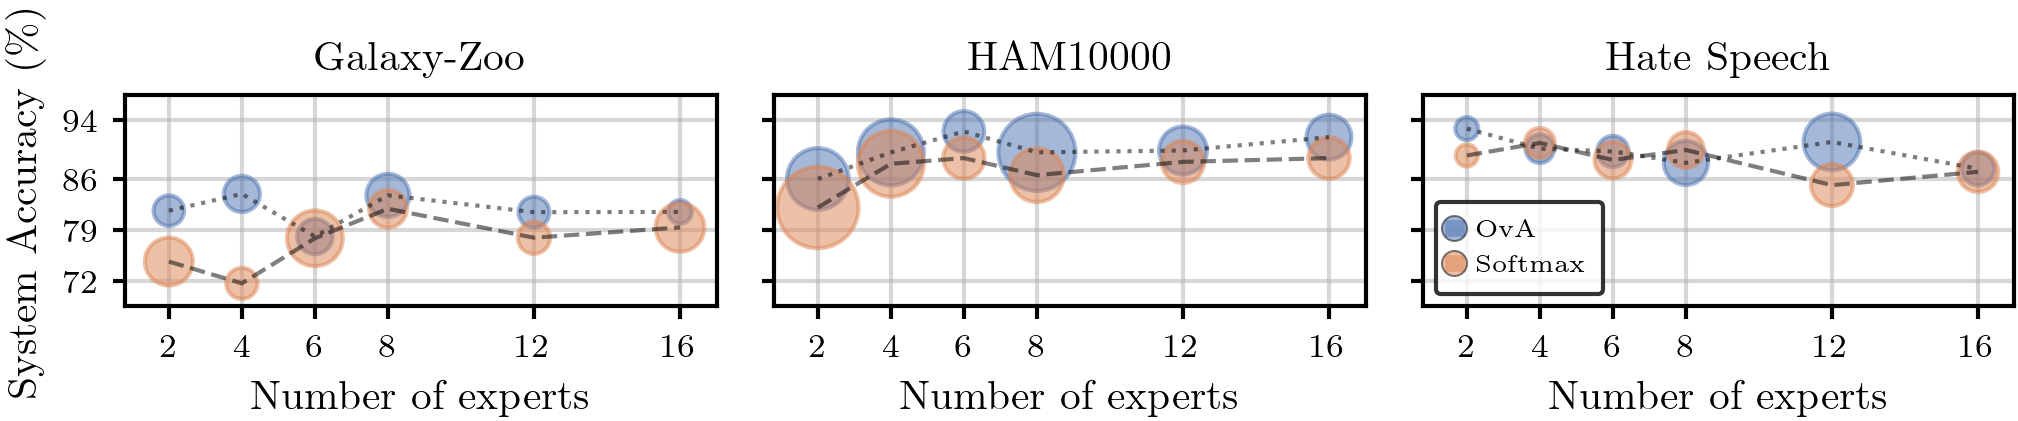

In [40]:
set_aistats2023_style()
plt.rcParams.update({"figure.dpi": 300})

fig, axs = plt.subplots(1,3,figsize=(7,5), sharex=False, sharey=True) # note we must use plt.subplots, not plt.subplot


min_y_global = min(np.concatenate([ova_galaxy_mean, ova_ham_mean, ova_speech_mean, softmax_galaxy_mean, softmax_ham_mean, softmax_speech_mean]))
max_y_global = max(np.concatenate([ova_galaxy_mean, ova_ham_mean, ova_speech_mean, softmax_galaxy_mean, softmax_ham_mean, softmax_speech_mean]))

scale_mark = 3
scale_y = 2
scale_x = 10
x_axis = [exp*scale_x for exp in exp_list]

# Galaxy =======================
# ==============================
dataset = "Galaxy-Zoo"
ax = axs[0]
for i, e in enumerate(exp_list):    
    radius_ova = ova_galaxy_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_galaxy_mean[i], ova_galaxy_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_galaxy_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_galaxy_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_galaxy_mean[i], softmax_galaxy_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_galaxy_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_galaxy_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_galaxy_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# HAM10000 =======================
# ================================
dataset = "HAM10000"
ax = axs[1]
for i, e in enumerate(exp_list):    
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_ham_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_ham_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_ham_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_ham_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# HateSpeech =======================
# ==================================
dataset = "Hate Speech"
ax = axs[2]
for i, e in enumerate(exp_list):    
    radius_ova = ova_speech_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_speech_mean[i], ova_speech_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_speech_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_speech_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_speech_mean[i], softmax_speech_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_speech_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))
ax.plot(x_axis, ova_speech_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_speech_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

datasets = ["Galaxy-Zoo", "HAM10000","Hate Speech"]
for i, ax in enumerate(axs):

    # x axis
    ax.set_xlim(min(x_axis)-12, max(x_axis)+10)
    ax.set_xticks(x_axis, exp_list)

    # y-axis
    min_y = min_y_global
    max_y = max_y_global
    yticks = np.round(np.linspace(min_y, max_y, 4))
    yticks = np.array([72, 79, 86, 94])
    yticks_labels = [int(y_i) for y_i in yticks]
    yticks_labels = [72, 79, 86, 94]
    ax.set_ylim(min(yticks*scale_y)-7, max(yticks*scale_y)+7)
    ax.set_yticks(yticks*scale_y, yticks_labels)

    # Legend
    if i==2:
        ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0])
        softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1])
        ax.legend(handles=[ova_leg, softmax_leg], loc="best", borderpad=0.7, prop={"size":6})
    if i==0:
        ax.set_ylabel(r"System Accuracy $(\%)$")
    ax.set_xlabel(r"Number of experts")
    ax.set_title("{}".format(datasets[i]))
    ax.grid()

    # IMPORTANT! This allows to get the circles. Otherwise, ellipses!
    ax.set_aspect(1, adjustable='box')


fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("datasets_system_accuracy.pdf")




In [37]:
yticks_labels

[72, 79, 86, 94]